In [2]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)
# num_words= 10000 indicates that top 10000 frequently occuring words will be kept. Rare words will be discarded

C:\Users\Admin\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
print(train_data[0])   # train_data and train_label are list of reviews where each review is a list of word indices(encoding 
                       # a sequence of words)
print(train_labels[0]) # train_label and test_label are list of 0's and 1's, 0 indicating a negative review and 1 indicating
                       # a positive review

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
1


In [4]:
# Because we restricted ourselves to top 10000 words, no word index will exceed 10000
print(max([max(sequence) for sequence in train_data]))

9999


In [5]:
#reversing indices back to words
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])
print(decoded_review)

? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

In [6]:
#encoding the integer sequences into a binary matrix

import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [7]:
print(train_data.shape)
print(x_train.shape)

(25000,)
(25000, 10000)


In [8]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [9]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [10]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [11]:
# Setting aside a validation set
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

In [12]:
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [13]:
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 5s 364us/step - loss: 0.4977 - acc: 0.7953 - val_loss: 0.3717 - val_acc: 0.8723
Epoch 2/20
15000/15000 [==============================] - 4s 257us/step - loss: 0.2959 - acc: 0.9043 - val_loss: 0.2990 - val_acc: 0.8908
Epoch 3/20
15000/15000 [==============================] - 3s 216us/step - loss: 0.2160 - acc: 0.9284 - val_loss: 0.3084 - val_acc: 0.8717
Epoch 4/20
15000/15000 [==============================] - 3s 217us/step - loss: 0.1742 - acc: 0.9433 - val_loss: 0.2830 - val_acc: 0.8842
Epoch 5/20
15000/15000 [==============================] - 3s 205us/step - loss: 0.1415 - acc: 0.9541 - val_loss: 0.2863 - val_acc: 0.8851
Epoch 6/20
15000/15000 [==============================] - 3s 202us/step - loss: 0.1143 - acc: 0.9652 - val_loss: 0.3090 - val_acc: 0.8809
Epoch 7/20
15000/15000 [==============================] - 3s 202us/step - loss: 0.0970 - acc: 0.9707 - val_loss: 0.3146 - 

In [14]:
history_dict = history.history # call to model.fit() returns a History object.
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

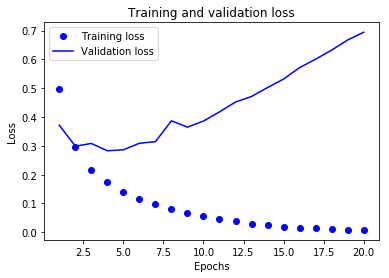

In [18]:
# Plotting the training and validation loss
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(history_dict['acc']) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

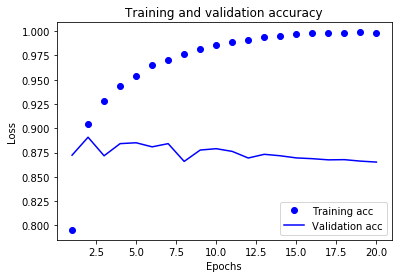

In [19]:
# Plotting the training and validation accuracy

plt.clf()
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
plt.plot(epochs, history_dict['acc'], 'bo', label='Training acc')
plt.plot(epochs, history_dict['val_acc'], 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [17]:
# Retraining model from scratch with 4 epoch as we can see in above graphs that the validation accuracy poeaks at 4th epoch
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['accuracy'])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 4s 153us/step - loss: 0.4750 - acc: 0.8212
Epoch 2/4
25000/25000 [==============================] - 3s 137us/step - loss: 0.2654 - acc: 0.9097
Epoch 3/4
25000/25000 [==============================] - 3s 133us/step - loss: 0.1983 - acc: 0.9301
Epoch 4/4
25000/25000 [==============================] - 4s 160us/step


In [21]:
results

[0.3234772595882416, 0.87288]

In [26]:
# different apporaches for same example
# 1
model= models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(1,activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(partial_x_train, partial_y_train, epochs=4, batch_size=512,validation_data=(x_val, y_val))
results= model.evaluate(x_test,y_test)
print(results)

Train on 15000 samples, validate on 10000 samples
Epoch 1/4
15000/15000 [==============================] - 4s 236us/step - loss: 0.5014 - acc: 0.7891 - val_loss: 0.3900 - val_acc: 0.8668
Epoch 2/4
15000/15000 [==============================] - 3s 219us/step - loss: 0.3190 - acc: 0.9025 - val_loss: 0.3325 - val_acc: 0.8732
Epoch 3/4
15000/15000 [==============================] - 3s 213us/step - loss: 0.2451 - acc: 0.9260 - val_loss: 0.3013 - val_acc: 0.8815
Epoch 4/4
25000/25000 [==============================] - 4s 145us/step
[0.29628369585037234, 0.88236]


In [24]:
# 2
model= models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(1,activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(partial_x_train, partial_y_train, epochs=4, batch_size=512, validation_data=(x_val,y_val))
results= model.evaluate(x_test,y_test)
print(results)

Train on 15000 samples, validate on 10000 samples
Epoch 1/4
15000/15000 [==============================] - 4s 250us/step - loss: 0.5398 - acc: 0.7870 - val_loss: 0.4045 - val_acc: 0.8686
Epoch 2/4
15000/15000 [==============================] - 3s 220us/step - loss: 0.3168 - acc: 0.9007 - val_loss: 0.3118 - val_acc: 0.8840
Epoch 3/4
15000/15000 [==============================] - 3s 209us/step - loss: 0.2268 - acc: 0.9258 - val_loss: 0.2856 - val_acc: 0.8881
Epoch 4/4
25000/25000 [==============================] - 4s 144us/step
[0.2930776562690735, 0.88228]


In [33]:
# 3
model= models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(1,activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(partial_x_train, partial_y_train, epochs=4, batch_size=512, validation_data=(x_val,y_val))
results= model.evaluate(x_test,y_test)
print(results)

Train on 15000 samples, validate on 10000 samples
Epoch 1/4
15000/15000 [==============================] - 4s 288us/step - loss: 0.5034 - acc: 0.7582 - val_loss: 0.3678 - val_acc: 0.8541
Epoch 2/4
15000/15000 [==============================] - 4s 261us/step - loss: 0.2695 - acc: 0.8977 - val_loss: 0.2763 - val_acc: 0.8929
Epoch 3/4
15000/15000 [==============================] - 4s 258us/step - loss: 0.1866 - acc: 0.9313 - val_loss: 0.3483 - val_acc: 0.8664
Epoch 4/4
25000/25000 [==============================] - 5s 199us/step
[0.4331735961294174, 0.8458]


In [34]:
# 4
model= models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(1,activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(partial_x_train, partial_y_train, epochs=4, batch_size=512, validation_data=(x_val,y_val))
results= model.evaluate(x_test,y_test)
print(results)

Train on 15000 samples, validate on 10000 samples
Epoch 1/4
15000/15000 [==============================] - 5s 353us/step - loss: 0.4601 - acc: 0.7901 - val_loss: 0.3949 - val_acc: 0.8312
Epoch 2/4
15000/15000 [==============================] - 4s 285us/step - loss: 0.2603 - acc: 0.9077 - val_loss: 0.3052 - val_acc: 0.8791
Epoch 3/4
15000/15000 [==============================] - 4s 289us/step - loss: 0.1981 - acc: 0.9315 - val_loss: 0.2749 - val_acc: 0.8918
Epoch 4/4
25000/25000 [==============================] - 5s 198us/step
[0.307127505235672, 0.87612]


In [35]:
# 5
model= models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(1,activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='mse', metrics=['accuracy'])
model.fit(partial_x_train, partial_y_train, epochs=4, batch_size=512, validation_data=(x_val,y_val))
results= model.evaluate(x_test,y_test)
print(results)

Train on 15000 samples, validate on 10000 samples
Epoch 1/4
15000/15000 [==============================] - 5s 309us/step - loss: 0.1615 - acc: 0.7657 - val_loss: 0.1055 - val_acc: 0.8608
Epoch 2/4
15000/15000 [==============================] - 4s 257us/step - loss: 0.0797 - acc: 0.8979 - val_loss: 0.0866 - val_acc: 0.8828
Epoch 3/4
15000/15000 [==============================] - 4s 249us/step - loss: 0.0560 - acc: 0.9271 - val_loss: 0.0829 - val_acc: 0.8891
Epoch 4/4
25000/25000 [==============================] - 5s 194us/step
[0.09854474658906459, 0.86944]


In [36]:
# 6
model= models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(1,activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='mse', metrics=['accuracy'])
model.fit(partial_x_train, partial_y_train, epochs=4, batch_size=512, validation_data=(x_val,y_val))
results= model.evaluate(x_test,y_test)
print(results)

Train on 15000 samples, validate on 10000 samples
Epoch 1/4
15000/15000 [==============================] - 4s 264us/step - loss: 0.1717 - acc: 0.7768 - val_loss: 0.1178 - val_acc: 0.8769
Epoch 2/4
15000/15000 [==============================] - 3s 219us/step - loss: 0.0912 - acc: 0.9055 - val_loss: 0.1018 - val_acc: 0.8729
Epoch 3/4
15000/15000 [==============================] - 3s 206us/step - loss: 0.0668 - acc: 0.9278 - val_loss: 0.0900 - val_acc: 0.8822
Epoch 4/4
25000/25000 [==============================] - 4s 151us/step
[0.09199462685108185, 0.8762]


In [37]:
# 7
model= models.Sequential()
model.add(layers.Dense(16, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(16, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(1,activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='mse', metrics=['accuracy'])
model.fit(partial_x_train, partial_y_train, epochs=4, batch_size=512, validation_data=(x_val,y_val))
results= model.evaluate(x_test,y_test)
print(results)

Train on 15000 samples, validate on 10000 samples
Epoch 1/4
15000/15000 [==============================] - 4s 279us/step - loss: 0.1570 - acc: 0.8005 - val_loss: 0.1082 - val_acc: 0.8819
Epoch 2/4
15000/15000 [==============================] - 3s 200us/step - loss: 0.0811 - acc: 0.9132 - val_loss: 0.0863 - val_acc: 0.8896
Epoch 3/4
15000/15000 [==============================] - 3s 204us/step - loss: 0.0558 - acc: 0.9358 - val_loss: 0.0843 - val_acc: 0.8876
Epoch 4/4
25000/25000 [==============================] - 4s 155us/step
[0.1002893939602375, 0.86272]
